In [2]:
using LinearAlgebra
using Plots

include("Cholesky.jl")
include("Algoritmo LU.jl")

LUPP (generic function with 1 method)

# ANÁLISIS NUMÉRICO
# TAREA 2
# Diego López Zanella


# PROBLEMA 1



Dados los siguientes vectores:
$$\alpha = \begin{pmatrix} 4 \\ 3  \end{pmatrix}, \;\; \beta = \begin{pmatrix} 2 \\ 1 \\ 2  \end{pmatrix}$$

encuentre la matriz de rotación $G$ y el reflector de Householder $F$ tales que 

$$G \alpha = \begin{pmatrix} 5 \\ 0  \end{pmatrix}, \;\; F \beta = \begin{pmatrix} -3 \\ 0 \\ 0  \end{pmatrix}$$


In [3]:
#Problema 2

A = [4 10; 3 0]
x = [4;3];
v = norm(x).*[1;0]-x
H = I-2* ( (v*v')./(v'*v) )
H*A
H

2×2 Matrix{Float64}:
 0.8   0.6
 0.6  -0.8

# Problema 3

El siguiente problema consiste en determinar la curva de crecimiento de una población de bacterias. Los datos a utilizar son: el número de individuos de una especia particular de bacterias $(y_i)$ en el tiempo $(t_i)$.

\begin{align}
        t & = [0,4,7.5,25,31,48.75,52,58.5,72.7,78,95,96,108,112,133,136.75,143,156.5,166.7,181] \\
        y & = [8,6,6,7,8,10,13,18,33,38,76,78,164,175,280,300,320,405,385,450].
\end{align}

# Recordatorio de qué son las ecuaciones normales

Tenemos como datos el vector $t$ y el vector $y$. Buscamos un vector de parámetros $c = (c_0, \dots , c_n)$ tal que si
    \begin{align}
        \phi (t) = c_0 +c_1 t+c_2t^2 + \cdots + c_n t^n
    \end{align}
entonces $\phi(t_i)=y_i$; es decir,
    \begin{align}
        A c = y
    \end{align}
donde $A$ es la matriz de diseño $A = \left( t_i^j \right)_{ij}$. Es posible que $y$ no esté en el rango de $A$, por lo que el problema podría no tener solución. Por tanto, buscamos una solución aproximada mediante el método de mínimos cuadrados. Se demuestra que el vector de parámetros $c$ que minimiza la distancia
    \begin{align}
        \left| \left| Ac - y \right| \right|
     \end{align}
es solución del sistema de ecuaciones normales:
    \begin{align}
        A^T A c = A^T y.
    \end{align}
Cuando la matriz $A$ tiene rango completo, $A^T A $ es una matriz definida positiva, por lo que podemos calcular su factorización de Cholesky: $A^T A = L L^T$. Por lo tanto, las ecuaciones normales se pueden resolver de la siguiente forma:

1 Encontramos una solución $w_0$ a la ecuación $Lw  = A^Ty$. Como $L$ es triangular inferior, podemos resolver este sistema mediante sustitución hacia adelante.

2 Encontramos una solución $c_0$ a la ecuación $L^T c = w_0$. Como $L^T$ es triangular superior, este sistema lo resolvemos mediante sustitución hacia adelante.

De esta forma,
    \begin{align}
        A^T A c_0 & = L L^T c_0 \\
        & = L w_0 \\
        & = A^T y.
    \end{align}
    
 Una vez encontrado el vector de parámetros $c_0$, ya podemos proponer el siguiente modelo para las observaciones $(t_i,y_i)$:
     \begin{align}
         \phi(t) = c^T \begin{pmatrix} 1 \\ t \\ \vdots \\ t^n
         \end{pmatrix}
     \end{align}

1 Realice un programa que calcule el polinomio de ajuste de grado $n$ (con $n$ dada por el usuario) mediante el método de Ecuaciones normales.

2. ¿Qué pasa cuando el valor de n crece?, ¿es mejor el ajuste?, ¿tiene
sentido para el fenómeno real?

In [4]:
#Datos dados. y_i es el número de individuos en el tiempo t_i.
t = [0 ; 4; 7.5; 25; 31; 48.75; 52 ; 58.5; 72.7; 78; 95; 96; 108; 112; 133; 136.75; 143; 156.5; 166.7;181];
y = [8; 6; 6; 7; 8; 10; 13; 18; 33; 38; 76; 78; 164; 175; 280; 300; 320; 405; 385; 450];

In [5]:
#Esta función toma como argumentos un vector de parámetros c = (c_0,c_1,..., c_{n-1})^T y regresa la función polinomial
# Poly(t) = c_0 + c_1 t+c_2 t^2+ ... + c_{n} t^n
#function Poly(c,n,t)
#    y = zeros(n+1)
#    for i = 0:n
#       y[i+1] = t^i 
#    end
#    return c'*y
#end

#### Esta función toma como argumentos un número natural n,
# un vector de tiempos t y un vector de población y (el elemento y_i es la cantidad de individuos en le tiempo t_i).
# PolyModel(n,t,y) arroja una función Modeln(t) polinómica de grado n que aproxima a las observaciones (t_i,y_i),
# es decir, Modeln(t_i) se parece a y_i
function PolyModel(n,t,y)
    #Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
    
    #Buscamos la factorización de Cholesky de A^T A
    (L,U) = FacChol(A'*A)

    # Encontramos una solución w_0 a la ecuación lineal  Lw = A^Ty mediante la función SolFwd 
    #   (porque L es triangular inferior).
    w0 = SolFwd(L,A'*y)

    # Encontramos una solución c_0 a la ecuación lineal L^Tc = w_0 mediante la función SolBwd
    # (porque L^T es triangular superior).
    c0 = SolBwd(L',w0)
    
    #Aquí construimos la función polinomial PolyMod(x) = c0^T * (1,x, ... , x^n)^T
    function PolyFun(x)
        y = zeros(n+1)
        for i = 1:n+1
            y[i] = x^(i-1)
        end
        return c0'*y
    end
    
    return(PolyFun)
end

PolyModel (generic function with 1 method)

In [6]:
n = 21
#Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
cond(A'*A)

1.9208751879069884e76

Lo siguiente es una prueba.

In [7]:
t2 = [ 1; 2; 3; 4]
y2 = t2.*t2

f = PolyModel(2,t2,y2)

(::var"#PolyFun#3"{Int64, Vector{Float64}}) (generic function with 1 method)

Usando la función PolyModel definida arriba, obtenemos un modelo 
$g = PolyModel(n,t,y)$. Ahora vamos a plotear $(t_i,y_i)$ y $(t_i,g(t_i) )$ para observar qué tan bien ajusta los datos la función $g$.

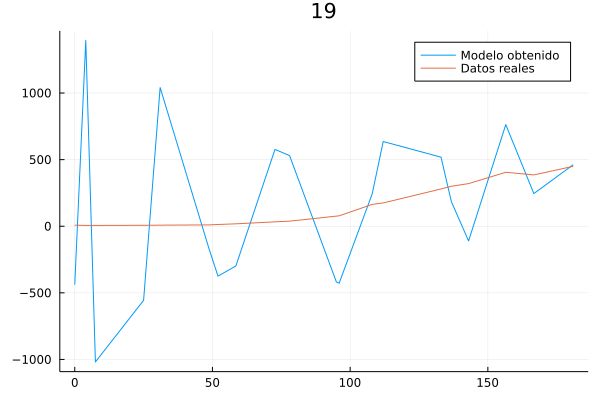

In [8]:
# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar
n = 19
g = PolyModel(n,t,y)

plot(t,[g,y], title =  n, label=["Modelo obtenido" "Datos reales" ] )

# Problema 4

Lo mismo pero ahora usando la facotorización $QR$ en lugar de las ecuaciones normales.

In [9]:
#Esta función toma como argumento una matriz A y regresa la matriz de Householder H tal que
# HA es una matriz cuya primera columna tiene puros ceros debajo de la diagonal
function Householder(A)
    (m,n)=size(A)

    x = A[:,1]

    e1 = zeros(m)
    e1[1] = 1.0

    v = x+sign(A[1,1])*norm(x)*e1
    v = v/norm(v)

    H = I -2*v*v'
end

#Esta función toma como argumento una matriz A de mxn. Regresa una tupla (Q,R) donde Q es una matriz ortogonal y
# R es una matriz triangular superior tales que QR = A.
function QRHouseholder(A)
    (m,n) = size(A)
    Q = Matrix(1.0*I,m,m)
    R = A

    for i = 1:n
        HTild = Householder(R[i:m,i:n] )
    
        H = Matrix(1.0*I,m,m)
        H[i:m,i:m] = HTild
    
        R = H*R
        Q = H*Q
    end
    Q = Q'
    return(Q,R)
end

QRHouseholder (generic function with 1 method)

In [2]:
function PolyModelQR(n,t,y)
    #Número de observaciones
    m = length(t) 
    
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    
    
    #Queremos resolver la ecuación  A c = y. Para esto encontramos la factorización QR de A:
    (Q,R) = QRHouseholder(A)
    
    # La ecuación se convierte en Rc= Q^Ty. Como R es triangular superior, esto lo podemos resolver por sustitución
    # hacia atrás
    
    #c0= SolBwd(R,Q'*y)
    
    #R tiene dimensiones mxn+1
    s = min(m,n+1)
    R2 = R[1:s,1:s]
    c0 = SolBwd(R2,Q'*y)        
    
    #Aquí construimos la función polinomial PolyFun(x) = c0^T * (1,x, ... , x^n)^T
    function PolyFun(x)
        b = zeros(s)
        for i = 1:s
            b[i] = x^(i-1)
        end
        return c0'*b
    end
    
    return(PolyFun)
end

PolyModelQR (generic function with 1 method)

In [3]:
#Ahora vamos a plotear los datos reales (t_i,y_i), los datos modelados mediante el algoritmo QR (t_i,h(t_i)) y
# los datos modelados mediante ecuaciones normales (t_i,g(t_i)).

# Este dato lo puede cambiar el usuario. Es el grado del polinomio que 
# vamos a usar para ajustar. Necesitas m > n
n = 19

#Modelo a partir de ecuaciones normales
#g = PolyModel(n,t,y)

#Modelo a partir de algoritmo QR
h = PolyModelQR(n,t,y)


plot(t,[y,h], title =  n, label=["Datos reales" "Modelo factorización QR Householder" ] )

#plot(t,[y,g,h], title =  n, label=["Datos reales" "g(t) ecuaciones normales" "h(t) algoritmo QR" ] )
   

LoadError: UndefVarError: t not defined

Observemos que los datos se ajustan muy bien al modelo.
¿Cuál es el número de condición de R?

In [12]:
m = length(t) 
    
for n = 1:19
    #Calculamos la matriz de diseño A. Esta es una matriz de  mx(n+1). La entrada A_{ij} = t_i^{j-1}
    A = zeros(m,n+1);
    for i = 1:m
        for j = 1:n+1
            A[i,j] = t[i]^(j-1)
        end
    end
    (Q,R) = QRHouseholder(A)
    println( ("n = ",n,"cond(R)=",cond(R), "cond(A^T*A) = ", cond(A'*A)))
end

("n = ", 1, "cond(R)=", 187.25029863335945, "cond(A^T*A) = ", 35062.67433828433)
("n = ", 2, "cond(R)=", 34918.52335869614, "cond(A^T*A) = ", 1.2193032735740993e9)
("n = ", 3, "cond(R)=", 6.261546153092644e6, "cond(A^T*A) = ", 3.92069609137215e13)
("n = ", 4, "cond(R)=", 1.1261969033630772e9, "cond(A^T*A) = ", 1.2682213500233848e18)
("n = ", 5, "cond(R)=", 2.0774101372219263e11, "cond(A^T*A) = ", 1.5373901344564632e23)
("n = ", 6, "cond(R)=", 3.871924646072298e13, "cond(A^T*A) = ", 2.1068354153073705e26)
("n = ", 7, "cond(R)=", 8.107708514361775e15, "cond(A^T*A) = ", 6.615572427374224e29)
("n = ", 8, "cond(R)=", 1.471594394070287e18, "cond(A^T*A) = ", 1.4763598407746939e34)
("n = ", 9, "cond(R)=", 7.762495610404213e20, "cond(A^T*A) = ", 1.8564396390630998e37)
("n = ", 10, "cond(R)=", 1.1385290757354841e25, "cond(A^T*A) = ", 1.759474976951025e41)
("n = ", 11, "cond(R)=", 1.0331067176441162e27, "cond(A^T*A) = ", 2.8154417452613565e45)
("n = ", 12, "cond(R)=", 3.5852064747051696e28, "cond

Podemos observar que tanto $R$ como $A^TA$ están muy mal condicionadas, pero $A^TA$ está mucho peor condicionada.

# Problema 5

Considere los siguientes datos, obtenidos de un experimento a intervalos de un segundo, con la primera observación en el tiempo $t = 1.0$:

t: 1 - 9                
5.0291                    
6.5009                   
5.3666                   
4.1272                   
4.2948                   
6.1261                   
12.5140                  
10.0502         
9.1614         

t: 10 -18 
7.5677 
7.2920
10.0357
11.0708
13.4045
12.8415
11.9666 
11.0765
11.7774 

t: 19 - 25  
14.5701
17.0440 
17.0398 
15.9069 
15.4850
15.5112
17.6572



1. Utilizando las ecuaciones normales, ajuste los datos por una línea recta $y(t) = \beta_1 + \beta_2 t$ y grafique los residuales $y(t_k)-y_k$. Observe que uno de los datos tiene un residual mucho mayor que el resto. Sospechamos que no encaja con el resto de los datos, es decir, es un valor atípico.